In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    missing_values = df.isnull().sum()
    if missing_values.any():
        df_cleaned = df.dropna()
        print("Linhas com valores ausentes foram removidas.")
    else:
        df_cleaned = df

    return df_cleaned

In [3]:
def detect_label_column(df):
    label_column = df.columns[-1]
    return label_column

In [4]:
def main(file_path):
    df = load_and_prepare_data(file_path)

    label_column = detect_label_column(df)

    X = df.drop(columns=[label_column])
    y = df[label_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    accuracies = []

    logisticRegression = LogisticRegression(max_iter=200)

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        logisticRegression.fit(X_train, y_train)
        accuracy = logisticRegression.score(X_test, y_test)
        accuracies.append(accuracy)

    print(f"Acurácias de cada fold: {accuracies}")
    mean_accuracy = np.mean(accuracies)
    print(f"Acurácia média: {mean_accuracy:.2f}")

    plt.bar(range(1, len(accuracies) + 1), accuracies)
    plt.axhline(y=mean_accuracy, color='r', linestyle='--', label='Acurácia Média')
    plt.xlabel('Fold')
    plt.ylabel('Acurácia')
    plt.title('Acurácia do Classificador em cada Fold')
    plt.legend()
    plt.show()

Acurácias de cada fold: [0.7532467532467533, 0.7857142857142857, 0.7532467532467533, 0.803921568627451, 0.7450980392156863]
Acurácia média: 0.77


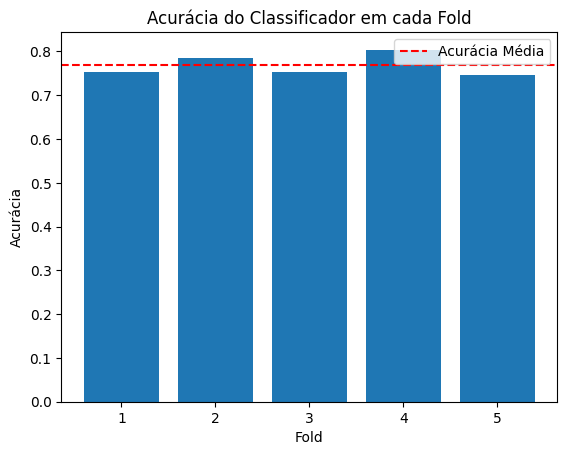

In [5]:
file_path = './diabetes.csv'

main(file_path)